- In this chapter, we'll introduce **classification**
    - The **Logistic Regressor** shares the same foundations as the Linear Regressor

_____

# Defining a classification problem

- In the previous chapters, our regression model predicted a **continous** target variable
    - Classification, instead, predicts an outcome from a **finite set of possibilities**
    
- Simplest classification: binary
    - E.g. True/False, Non-default/default, etc.
        - If the prediction is True, we call it a **positive sample**. Otherwise, it's a **negative sample**

### Example binary classification problems

- Is this email spam?
- Is this house worth more than $200,000
- Will the customer open the coupon link in the email?
- Is the image of a man or a woman

- When there are more than two possible outcomes (i.e. the classification problem isn't binary), we call it a **multiclass classification**

### Example multiclass classification problems

- What kind of flower is this?
- What is the primary topic of the webpage?
- Which digit is drawn in the image?

____

# Formalization of the problem: binary classification

- We train our model on the vector $x$ which contains $n$ observations of the $k$ predictor variables and we map it to our outcome vector $y$. The $i^{th}$ observation can be written as:

# $(x_{i},y_{i}): x_{i} \in \Re^{k}, y_{i} \in \{0,1\}$

- Once we've trained our model, we'll have a classifier called a **classification function** of the form:

# $f: \Re^{k} \rightarrow \{0,1\}$

### Example

- The `make_classifier` method from the scikit-learn library creates dummy variables from categorical variables

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = 10, 10

- Generating random dataset
    - `n_samples` specifies how many observations in the dataset
    - `n_features` specifies the number of predictor variables i.e. the number of columns in $X$
    - `n_informative` specifies how many of the predictor variables are actually perdictive
    - `n_redundnat` specifies how many of the predictor variables don't contribute anything to the predictive power of the model
        - As we can see, there are 2 variables total with 2 being informative and 0 being redundant
    - `n_clusters_per_class` specifies how many groups we can (roughly) split the data from each variable into
        - This will make more sense when plotting the data
    - `class_sep` specifies how far apart the clusters will be in the data
    - `random_state` locks in the starting position for the random number generator

In [3]:
X, y = make_classification(n_samples = 1000,
                          n_features = 2,
                          n_informative = 2,
                          n_redundant = 0,
                          n_clusters_per_class = 1,
                          class_sep = 2.0, 
                          random_state = 101)

In [4]:
df_data = pd.DataFrame(X, columns = ['Feature 1', 'Feature 2'])
df_data['Target'] = y

In [5]:
df_data.head()

,Feature 1,Feature 2,Target
0,1.470656,-1.311202,0
1,-2.377659,-2.096367,1
2,2.576045,-2.552494,0
3,1.599512,-0.557330,0
4,-2.558502,-2.154992,1


- As we can see above, the data contains a column of continous values for the two features, and a binary column for the target

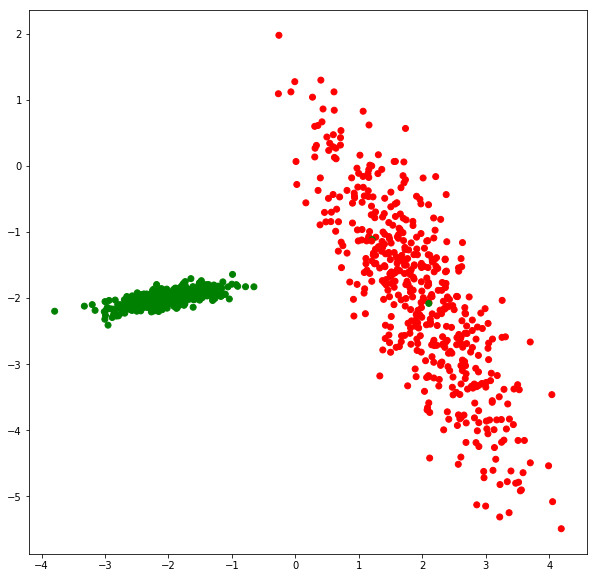

In [6]:
x_vals = df_data['Feature 1'].values
y_vals = df_data['Feature 2'].values
colors = df_data['Target'].map(lambda x: 'r' if x==0 else 'g').values
plt.scatter(x_vals, y_vals, c = colors)

- From the plot above, we can see that the cloud on the left represent the combinations of feature values where the Target had a  value of 1, and the cloud on thr right represents a value of 0

_____

# Assessing the classifier's performance

- To be able to evaluate the performance of the classification function, we need to define some new metrics
    - We need to keep in mind that the definition of performance can vary
        - Examples
            - Percentage of results correctly labeled
            - Completeness of a defined label
            - Minimization of number of misclassifications
                - For example, if we're building a spam filter, we may prefer having some spam mail pass through the filter than risk sending non-spam to the junk mailbox

- The metrics we'll describe can be used for both binary and multiclass classification problems

___

### 1. Confusion Matrix

- Although this technically isn't a statistical measure, it's a nice way to visualize the impact of correct and incorrect misclassifications
    - Let's create some random target and y-hat values

In [7]:
target = [0,0,0,0,0,0,1,1,1,1]
y_hat = [0,0,0,0,1,1,1,1,1,0]

- Now we'll use the `confusion_matrix` method to build the confusion matrix

In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
matrix = confusion_matrix(target, y_hat)
matrix

array([[4, 2],
       [1, 3]], dtype=int64)

- So all we get from this method is the matrix:

# $\begin{bmatrix}4 & 2\\ 1 & 3\end{bmatrix}$

### What is this telling us?

1. the `target` and `y_hat` lists each have 10 elements
    - If we take the sum of each element of the confusion matrix, the total is 10
    - This means that it tells us the sample size
    
2. the sum of the first row is 6
    - We note that the number of 0's in the `target` list is also 6
    - Similarly, the sum of the second row is equal to the number of 1's in the `target` list
    
3. like observation 2, but for the columns, the sum of the columns tells us the number of 0's and 1's in the `y_hat` list

### As we can already guess, this matrix represents the transitions from the states in `target` to `y_hat` (think Markov processes)

#### There are 2 states in the `target` array (0 and 1) and 2 states in the `y_hat` array (also 0 and 1)

- Of the six 0 values in the target array, four got mapped to 0 (correctly) and two got mapped to 1 (representing a misclassification)

- Of the four 0 values in the target array, one got mapped to 0 (misclassification) and three were mapped to 1 (correct)

#### Therefore, the diagonal values in the matrix represent CORRECT classifications, and the non-diagonals represent INCORRECT classifications

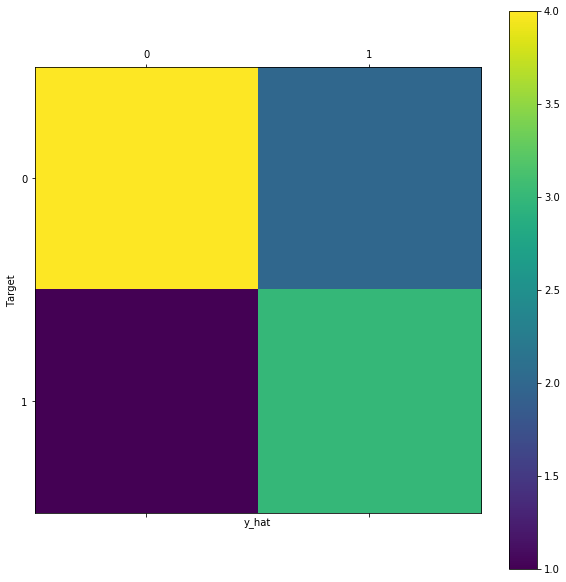

In [10]:
plt.matshow(matrix)
plt.colorbar()
plt.ylabel('Target')
plt.xlabel('y_hat')
plt.show()

___

### 2. Accuracy

- The classifier's accuracy tells us the proportion of classifications that are correct
    - Recall that the matrix diagonals tells us the correct classifications, and sum of the values in the matrix tell us the total number of observations
        - Therefore, the accuracy for this classifier is equal to:
        
# $\left ( \text{Accuracy} \right ) = \frac{4+3}{10} = 0.7$

- There's also a scikit-learn method for performing this calculation

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
accuracy_score(target, y_hat)

0.7

___

### 3. Precision

- This value only cares about the 1's in `y_hat`
    - What this measure tells us is **how trustworthy our prediction is**
        
- Therefore, to calculate precision, we take the proportion of the 1's in `y_hat` that were correctly mapped from 1's in `target`
    - In other words, we take the bottom right diagonal and divide it by the sum of the second column
    
# $\left ( \text{Precision} \right ) = \frac{3}{3+2} = 0.6$

In [13]:
from sklearn.metrics import precision_score

In [14]:
precision_score(target, y_hat)

0.6

_____

### 4. Recall

- **Precision**: we predicted that an event DID occur. How confident can we be in this prediction?

- **Recall**: an event DID occur. How likely is it that we predicted that it did?

- Therefore, precision looks at where we predicted a value of 1 in `y_hat` and tells us how many were correct while recall looks at the 1 values in `target` and tells us **how many we got right**

- So, we can calculate the recall of the model as the ratio of the value in the bottom right corner of the matrix to the sum of the values in the bottom row i.e.

# $\left ( \text{Recall} \right ) = \frac{3}{4} = 0.75$

- There's also a simple scikitlearn metric for calculating this

In [15]:
from sklearn.metrics import recall_score

In [16]:
recall_score(target, y_hat)

0.75

____

### 5. Comprehensive f1 score

- Precision and recall tell us how well the classifier is performing for identifying positive events
    - The comprehensive f1 score combines these metrics using the harmonic average
    
# $f1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall} = 2 \cdot \frac{(3/5)\cdot(3/4)}{3/5 + 3/4} = 2\cdot(9/27) = 2/3 = 0.667$

In [17]:
from sklearn.metrics import f1_score

In [18]:
f1_score(target, y_hat)

0.6666666666666665

____

### Summary of metrics

- We have all these different statistical measures of the classifier
    - **Which is the best to use?**
        - **ANSWER:** all of them!

In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(target, y_hat))

             precision    recall  f1-score   support

          0       0.80      0.67      0.73         6
          1       0.60      0.75      0.67         4

avg / total       0.72      0.70      0.70        10



_____

# Defining a probability based approach

- When we think about logistic regression, we have to take a feature vector, and derive the function that maximizes the following conditional probability:

# $P(y_{i} = 1 | f(X_{i})=1)$


- We'll use the data from earlier (green and red scatter plots) to build this model, but we'll need to do two things first:
    - Split the data into a training set, and a testing set
        - **Why?**
            - That way, we'll build a model on a subset of the data, then test its accuracy on the rest of the data
    - Convert the target values to floating point values
        - **Why?**
            - That way, we can use the regular regression methods

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(float), test_size = 0.33, random_state = 101)

- Now we can perform the regression like a regular simple multiple regression

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

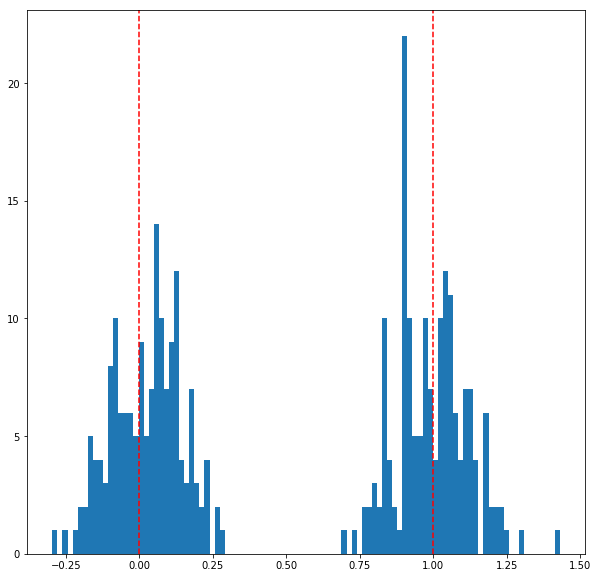

In [26]:
plt.hist(model.predict(X_test), bins = 100)
plt.axvline(0, ls = 'dashed', c = 'r')
plt.axvline(1, ls = 'dashed', c = 'r')
plt.show()

### So, the $\hat{y}$ values produced by our model tells us the probability that the target variable is equal to 1

#### I.e. if the value is 0.2, the model thinks there's a greater chance that the target variable has a value of 0 than 1

### But why do we have negative values? And values greater than 1?

- We know that probabilities must be between 0 and 1
    - We could fix this by mapping all negative values to 0 and all values greater than 1 to 1

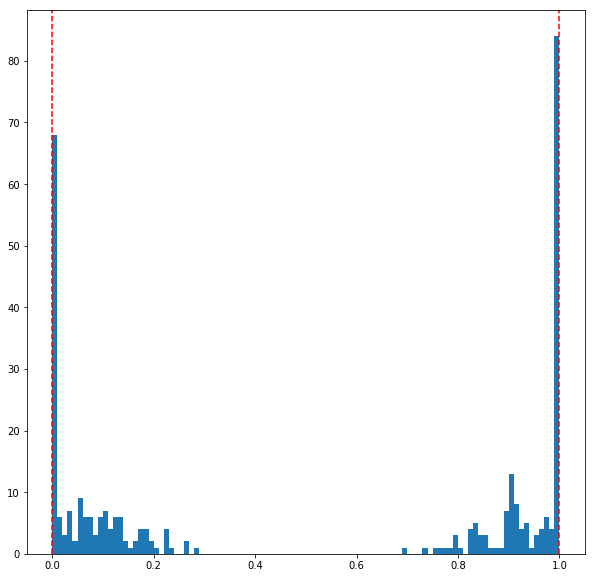

In [27]:
plt.hist(np.maximum(np.minimum(model.predict(X_test), 1),0), bins = 100)
plt.axvline(0, ls = 'dashed', c = 'r')
plt.axvline(1, ls = 'dashed', c = 'r')
plt.show()

### This seems to have solved our problem, but we can still do better

### Recall:

- In the previous chapter, our array of $\beta$ coefficients was denoted $w$ and we calculated $\hat{y}$ as:

# $\hat{y} = X \cdot w$

### To get our new model to work, we'll use a [*Sigmoid Function*](https://en.wikipedia.org/wiki/Sigmoid_function)

- Sigmoid functions take values between $-\infty$ and $+\infty$ and map them to values between 0 and 1

### We derive our probabilities using the following function:

# $\hat{y} = \sigma\left (W^{T}\cdot x \right )$

### Where $\sigma$ is called the logistic function (aka inverse logit function) defined as:

# $\sigma (t) = \frac{1}{1 + e^{-t}}$

- Why do we use this function?
    - At $t=0$, $\sigma(0) = 1/2 = 0.5$ which satisfies our condition for modelling binary variables
    - At $t = -\infty$, $\sigma(-\infty) = \frac{1}{1+e^{\infty}} = 0$ and at $t=\infty$, $\sigma(\infty) = \frac{1}{1+e^{-\infty}} = 1$
        - **Therefore $\sigma$ is symmetric arount 0.5 and is always between 0 and 1**
            - This is exactly what we need

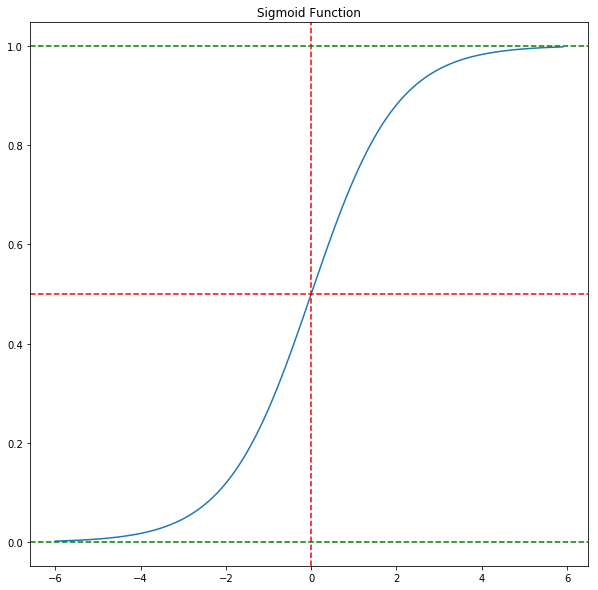

In [31]:
x = np.arange(-6, 6, 0.1)
y = 1/(1+np.exp(-x))
plt.plot(x, y)
plt.title('Sigmoid Function')
plt.axvline(0, ls = 'dashed', c = 'r')
plt.axhline(0.5, ls = 'dashed', c = 'r')
plt.axhline(0, ls = 'dashed', c = 'g')
plt.axhline(1, ls = 'dashed', c = 'g')
plt.show()